# K-Means and VQ
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **K-Means clustering** algorithm
- play with the hyperparameter K 
- implement the Vector Quantization with K-Means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked.

In [2]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

Run your k-means algorithm on `kmeans_data.mat`. Note that the lines indicate the iterations of centroids.

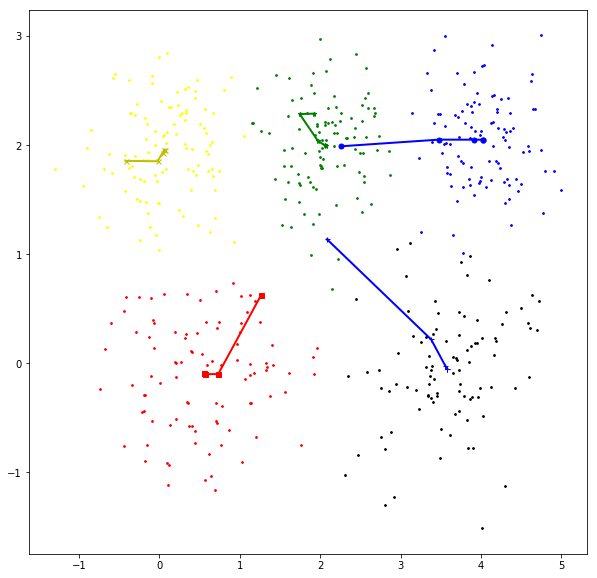

In [6]:
from kmeans import kmeans
from kmeans_plot import kmeans_plot
x = sio.loadmat('kmeans_data.mat')['X']
k = 5  # modify if you want
idx, ctrs, iter_ctrs = kmeans(x, k)
kmeans_plot(x, idx, ctrs, iter_ctrs)

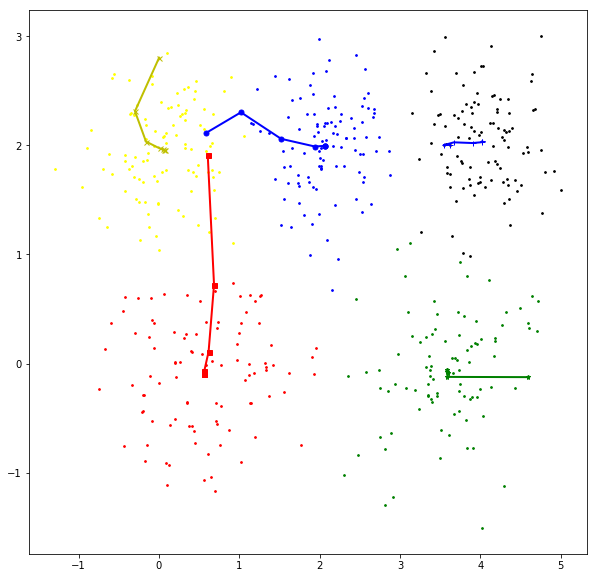

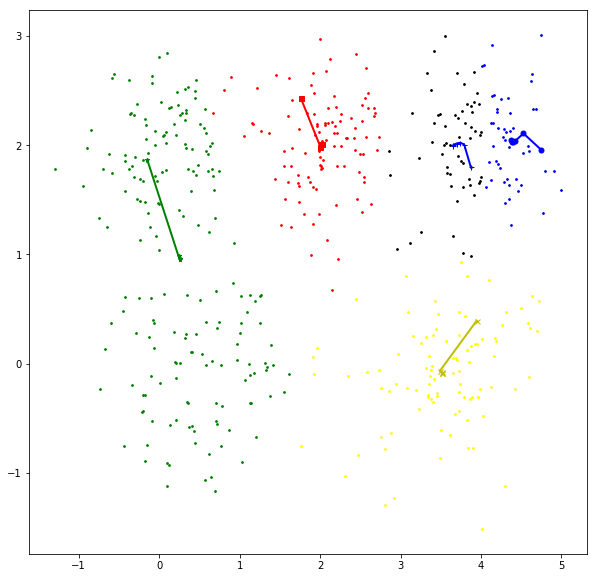

In [7]:
def sd(x, idx, ctrs, K):
    dis = 0
    for k in range(K):
        x_k = x[idx==k, :]
        diff = x_k - ctrs[k, :]
        dis += np.sum(diff**2)
    return dis

min_dis, best_idx, best_ctrs, best_iter_ctrs = np.inf, None, None, None
max_dis, worst_idx, worst_ctrs, worst_iter_ctrs = -np.inf, None, None, None
for _ in range(100):
    idx, ctrs, iter_ctrs = kmeans(x, k)
    tmp_dis = sd(x, idx, ctrs, k)
    if tmp_dis<min_dis:
        min_dis, best_idx, best_ctrs, best_iter_ctrs = tmp_dis, idx, ctrs, iter_ctrs
    if tmp_dis>max_dis:
        max_dis, worst_idx, worst_ctrs, worst_iter_ctrs = tmp_dis, idx, ctrs, iter_ctrs

kmeans_plot(x, best_idx, best_ctrs, best_iter_ctrs)
kmeans_plot(x, worst_idx, worst_ctrs, worst_iter_ctrs)

Run your k-means algorithm on the digit dataset `digit_data.mat`. 

10
20
50


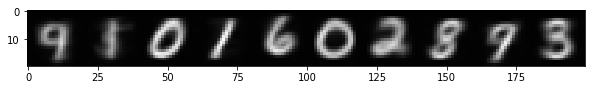

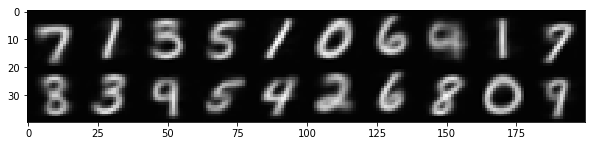

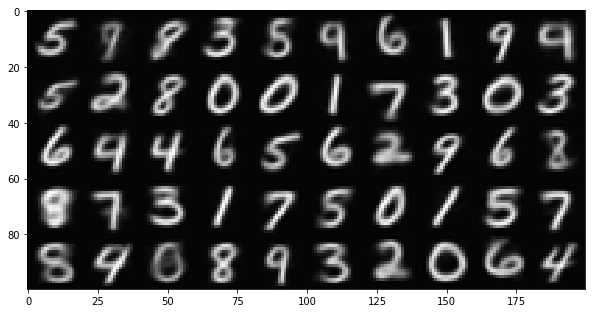

In [7]:
from show_digit import show_digit
x = sio.loadmat('digit_data.mat')['X']
for k in [10, 20, 50]:
    print(k)
    _, ctrs, _ = kmeans(x, k)
    show_digit(ctrs)

# Vector quantization
Compress images with K set to 8, 16, 32 and 64.

8
16
32


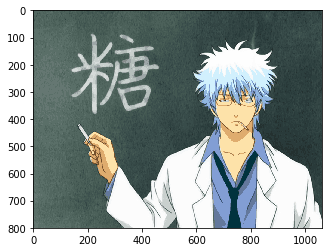

In [3]:
from kmeans import kmeans
from matplotlib.pyplot import imread
img = imread('sample1.jpg')
fea = img.reshape((img.shape[0]*img.shape[1], 3)).astype(np.float64)
# YOUR (SEVERAL LINES) CODE HERE

# begin answer
#for k in [8, 16, 32, 64]:
for k in [8, 16 ,32]:
    print(k)
    fea = img.reshape((img.shape[0]*img.shape[1], 3)).astype(np.float64)
    idx, ctrs, _ = kmeans(fea, k)
    fea = ctrs[idx]
    plt.imshow(fea.reshape(img.shape).astype(np.uint8))
    plt.savefig('./output/compress{}.png'.format(k))
    
# end answer

#plt.imshow(fea.reshape(img.shape).astype(np.uint8))


In [5]:
from huffman_encoding import huffman_ecoding
fea = img.reshape((img.shape[0]*img.shape[1], 3)).astype(np.float64)
print('original size:', img.shape[0]*img.shape[1]*24)
idx, ctrs, _ = kmeans(fea, 64)
print(idx)
print('compress size(using huffman):', huffman_ecoding(idx))

original size: 20390400
[19 40 40 ... 61 61 61]
compress size(using huffman): 4646254
